In [1]:
# This notebook explores the linear regression using Lasso regularization
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
# 
# We use California housing dataset.

In [2]:
# import external libraies
%matplotlib inline

import numpy as np
from sklearn import datasets, __version__
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# import dataset
CAL = datasets.fetch_california_housing()

In [4]:
# description
print(CAL['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

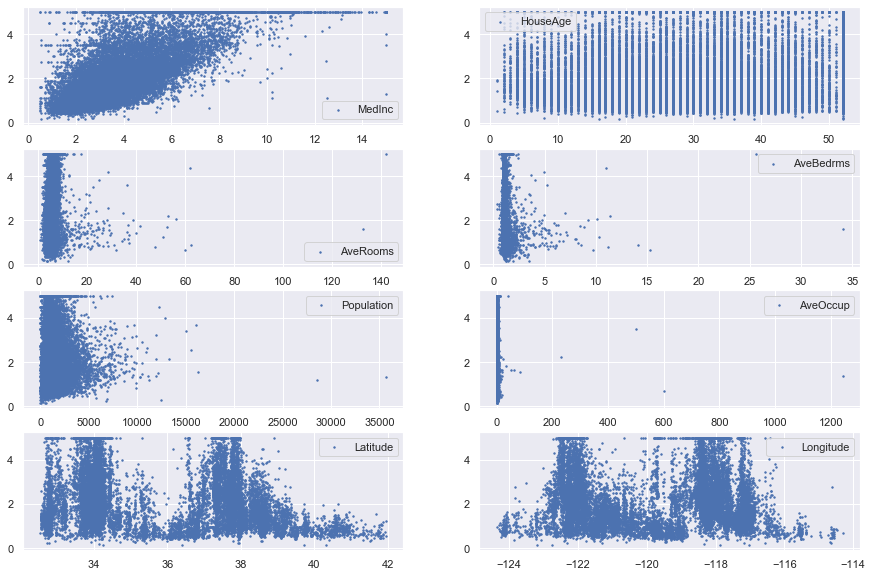

In [5]:
# let's plot each feature vs. labelled data
plt.figure(figsize=(15,10))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.scatter(CAL.data[:,i], CAL.target, s=2, label=CAL.feature_names[i])
    plt.legend(loc='best')

In [6]:
# split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(CAL.data, CAL.target, test_size=5000, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15640, 8), (5000, 8), (15640,), (5000,))

In [7]:
# function to carry out Lasso Regression
def doLassoRegression(Xtrain, ytrain, Xval, yval, alpha=1, plotting=True):
    
    lasso_reg = Lasso(alpha)
    lasso_reg.fit(Xtrain, ytrain)
    if plotting:
        print('coefficients:', lasso_reg.coef_)
        print('intercept:', lasso_reg.intercept_)

    predictions = lasso_reg.predict(Xval)
    mse = mean_squared_error(yval, predictions)
    if plotting:
        print("Mean squared error: %.3f" % mse)
    
    return lasso_reg.coef_, lasso_reg.intercept_, mse


## Individual features

In [8]:
X = dict()
# do the regression for each feature 
for i, name in enumerate(CAL.feature_names):
    print(i, name)
    Xtrain = X_train[:,i].reshape(-1,1)
    ytrain = y_train
    
    Xval = X_test[:,i].reshape(-1,1)
    yval = y_test

    scaler = StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xval = scaler.transform(Xval)
    
    coef, intercept, mse = doLassoRegression(Xtrain, ytrain, Xval, yval)
    X[name] = [coef[0], intercept, mse]
    
    print('=====')
    print()

0 MedInc
coefficients: [0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

1 HouseAge
coefficients: [0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

2 AveRooms
coefficients: [0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

3 AveBedrms
coefficients: [-0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

4 Population
coefficients: [-0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

5 AveOccup
coefficients: [-0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

6 Latitude
coefficients: [-0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

7 Longitude
coefficients: [-0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====



In [9]:
X

{'MedInc': [0.0, 2.0764193260869566, 1.3186646763113754],
 'HouseAge': [0.0, 2.0764193260869566, 1.3186646763113754],
 'AveRooms': [0.0, 2.0764193260869566, 1.3186646763113754],
 'AveBedrms': [-0.0, 2.0764193260869566, 1.3186646763113754],
 'Population': [-0.0, 2.0764193260869566, 1.3186646763113754],
 'AveOccup': [-0.0, 2.0764193260869566, 1.3186646763113754],
 'Latitude': [-0.0, 2.0764193260869566, 1.3186646763113754],
 'Longitude': [-0.0, 2.0764193260869566, 1.3186646763113754]}

## Mutiple features

In [10]:
# Multiple features
for i, name in enumerate(CAL.feature_names):
    j = i + 1
    print(i, CAL.feature_names[:j])
    
    Xtrain = X_train[:,:j].reshape(-1,j)
    ytrain = y_train
    
    Xval = X_test[:,:j].reshape(-1,j)
    yval = y_test

    scaler = StandardScaler().fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xval = scaler.transform(Xval)
    
    doLassoRegression(Xtrain, ytrain, Xval, yval)
    
    print('=====')
    print()

0 ['MedInc']
coefficients: [0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

1 ['MedInc', 'HouseAge']
coefficients: [0. 0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

2 ['MedInc', 'HouseAge', 'AveRooms']
coefficients: [0. 0. 0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

3 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
coefficients: [ 0.  0.  0. -0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

4 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']
coefficients: [ 0.  0.  0. -0. -0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

5 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
coefficients: [ 0.  0.  0. -0. -0. -0.]
intercept: 2.0764193260869566
Mean squared error: 1.319
=====

6 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude']
coefficients: [ 0.  0.  0. -0. -0. -0. -0.]
intercept: 2.0764193260869566
Mean squared error: 1

## Different alpha

In [11]:
# different alpha

# dashboard to hold regression coefficient, intercept, mse
C = pd.DataFrame()
I = pd.DataFrame()
M = pd.DataFrame()

for alpha in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 10, 100, 1000]:
    for i, name in enumerate(CAL.feature_names):
        Xtrain = X_train[:,i].reshape(-1,1)
        ytrain = y_train

        Xval = X_test[:,i].reshape(-1,1)
        yval = y_test

        scaler = StandardScaler().fit(Xtrain)
        Xtrain = scaler.transform(Xtrain)
        Xval = scaler.transform(Xval)

        coef, intercept, mse = doLassoRegression(Xtrain, ytrain, Xval, yval, alpha=alpha, plotting=False)
        C.loc[name, alpha] = coef
        I.loc[name, alpha] = intercept
        M.loc[name, alpha] = mse

In [12]:
C

,0.001,0.005,0.010,0.050,0.100,0.500,1.000,10.000,100.000,1000.000
MedInc,0.798864,0.794864,0.789864,0.749864,0.699864,0.299864,0.0,0.0,0.0,0.0
HouseAge,0.117630,0.113630,0.108630,0.068630,0.018630,0.000000,0.0,0.0,0.0,0.0
AveRooms,0.166832,0.162832,0.157832,0.117832,0.067832,0.000000,0.0,0.0,0.0,0.0
AveBedrms,-0.050765,-0.046765,-0.041765,-0.001765,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
Population,-0.023770,-0.019770,-0.014770,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
AveOccup,-0.022104,-0.018104,-0.013104,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
Latitude,-0.162858,-0.158858,-0.153858,-0.113858,-0.063858,-0.000000,-0.0,-0.0,-0.0,-0.0
Longitude,-0.053779,-0.049779,-0.044779,-0.004779,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0


In [13]:
I

,0.001,0.005,0.010,0.050,0.100,0.500,1.000,10.000,100.000,1000.000
MedInc,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
HouseAge,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
AveRooms,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
AveBedrms,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
Population,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
AveOccup,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
Latitude,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419
Longitude,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419,2.076419


In [14]:
M

,0.001,0.005,0.010,0.050,0.100,0.500,1.000,10.000,100.000,1000.000
MedInc,0.717383,0.717419,0.717508,0.719897,0.727093,0.953014,1.318665,1.318665,1.318665,1.318665
HouseAge,1.301421,1.301556,1.301769,1.305264,1.314102,1.318665,1.318665,1.318665,1.318665,1.318665
AveRooms,1.281404,1.281992,1.282749,1.289647,1.300373,1.318665,1.318665,1.318665,1.318665,1.318665
AveBedrms,1.315302,1.315506,1.315775,1.318520,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665
Population,1.317347,1.317499,1.317729,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665
AveOccup,1.317401,1.317585,1.317843,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665
Latitude,1.288393,1.288481,1.288638,1.291747,1.300275,1.318665,1.318665,1.318665,1.318665,1.318665
Longitude,1.316448,1.316413,1.316415,1.318233,1.318665,1.318665,1.318665,1.318665,1.318665,1.318665
